# Data Exploration - Hugging Face Stocks Dataset

Цел на този notebook:
- Зареждане на `paperswithbacktest/Stocks-Daily-Price` dataset от Hugging Face
- Преглед на структурата на данните
- Анализ на тикери и временен обхват
- Базова статистика и визуализации


In [1]:
# Импортиране на библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import warnings

warnings.filterwarnings('ignore')

# Настройка за визуализация
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("Библиотеки заредени успешно!")


Библиотеки заредени успешно!


## 1. Зареждане на Dataset от Hugging Face


In [2]:
# Зареждане на dataset
DATASET_NAME = "paperswithbacktest/Stocks-Daily-Price"

print(f"Зареждане на dataset: {DATASET_NAME}...")
print("Това може да отнеме няколко минути при първо зареждане...")

# Зареждаме dataset-а
dataset = load_dataset(DATASET_NAME)

print(f"\nDataset зареден успешно!")
print(f"Split-ове: {list(dataset.keys())}")


Зареждане на dataset: paperswithbacktest/Stocks-Daily-Price...
Това може да отнеме няколко минути при първо зареждане...


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/124M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/125M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/124M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/125M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/24507516 [00:00<?, ? examples/s]


Dataset зареден успешно!
Split-ове: ['train']


## 2. Преглед на структурата на данните


In [3]:
# Преглед на структурата
print("Информация за dataset-а:")
print(f"Брой split-ове: {len(dataset)}")
print(f"\nПърви split: {list(dataset.keys())[0]}")
print(f"Брой редове в първия split: {len(dataset[list(dataset.keys())[0]])}")

# Погледни първия пример
first_split = list(dataset.keys())[0]
print(f"\nПримерна структура:")
print(dataset[first_split][0])


Информация за dataset-а:
Брой split-ове: 1

Първи split: train
Брой редове в първия split: 24507516

Примерна структура:
{'symbol': 'A', 'date': '1999-11-18', 'open': 32.54649353027344, 'high': 35.765380859375, 'low': 28.612302780151367, 'close': 31.473533630371094, 'volume': 62546380, 'adj_close': 26.347028732299805}


In [4]:
# Конвертиране в pandas DataFrame за по-лесна работа
# Взимаме първия split (обикновено е 'train' или 'default')
split_name = list(dataset.keys())[0]
df = dataset[split_name].to_pandas()

print(f"DataFrame създаден успешно!")
print(f"Размери: {df.shape}")
print(f"\nКолони:")
print(df.columns.tolist())


DataFrame създаден успешно!
Размери: (24507516, 8)

Колони:
['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'adj_close']


In [5]:
# Първите 10 реда
print("Първи 10 реда от dataset-а:")
df.head(10)


Първи 10 реда от dataset-а:


,symbol,date,open,high,low,close,volume,adj_close
0,A,1999-11-18,32.546494,35.765381,28.612303,31.473534,62546380,26.347029
1,A,1999-11-19,30.713518,30.758226,28.478184,28.880545,15234146,24.176386
2,A,1999-11-22,29.551144,31.473534,28.657009,31.473534,6577870,26.347029
3,A,1999-11-23,30.400572,31.205294,28.612303,28.612303,5975611,23.951839
4,A,1999-11-24,28.701717,29.998213,28.612303,29.372318,4843231,24.588062
5,A,1999-11-26,29.238197,29.685265,29.148785,29.461731,1729466,24.662909
6,A,1999-11-29,29.327612,30.355865,29.014664,30.132332,4074751,25.224287
7,A,1999-11-30,30.042917,30.713518,29.282904,30.177038,4310034,25.261715
8,A,1999-12-01,30.177038,31.071173,29.953505,30.713518,2957329,25.710806
9,A,1999-12-02,31.294706,32.188843,30.892345,31.562946,3069868,26.421885


In [6]:
# Базова информация за данните
print("Базова информация:")
print(df.info())

print("\n" + "="*50)
print("Описателна статистика:")
print(df.describe())


Базова информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24507516 entries, 0 to 24507515
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   symbol     object 
 1   date       object 
 2   open       float64
 3   high       float64
 4   low        float64
 5   close      float64
 6   volume     int64  
 7   adj_close  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.5+ GB
None

Описателна статистика:
               open          high           low         close        volume  \
count  2.450750e+07  2.450750e+07  2.450750e+07  2.450750e+07  2.450752e+07   
mean   3.324670e+12  3.472496e+12  3.153227e+12  3.294732e+12  1.762207e+06   
std    6.254722e+14  6.531755e+14  5.928377e+14  6.204782e+14  1.780969e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.921875e+00  7.060000e+00  6.775000e+00  6.920000e+00  1.440000e+04   
50%    1.762000e+01  1.792000e+01  1.732000e+01  1.762000e+01 

## 3. Анализ на Тикери


In [7]:
# Уникални тикери
unique_tickers = df['symbol'].unique() if 'symbol' in df.columns else df.columns[0]

if isinstance(unique_tickers, str):
    # Ако колоната се казва различно, опитай да намерим тикер колоната
    ticker_cols = [col for col in df.columns if 'symbol' in col.lower() or 'ticker' in col.lower()]
    if ticker_cols:
        unique_tickers = df[ticker_cols[0]].unique()
    else:
        print("Не можах да намеря колона за тикери. Колоните са:")
        print(df.columns.tolist())
        unique_tickers = []

print(f"Брой уникални тикери: {len(unique_tickers)}")
print(f"\nПърви 20 тикера:")
print(unique_tickers[:20])


Брой уникални тикери: 6411

Първи 20 тикера:
['A' 'AA' 'AAAC' 'AACBU' 'AACG' 'AAL' 'AAM' 'AAME' 'AAMI' 'AAOI' 'AAON'
 'AAP' 'AAPG' 'AAPL' 'AARD' 'AAT' 'AAUC' 'AB' 'ABAT' 'ABBV']


In [8]:
# Проверка за популярни тикери (ако има данни)
popular_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA']

if len(unique_tickers) > 0:
    # Проверяваме кои от популярните са в dataset-а
    available_popular = [tick for tick in popular_tickers if tick in unique_tickers]
    print(f"Популярни тикери налични в dataset-а: {available_popular}")
    print(f"\nОбщо {len(available_popular)}/{len(popular_tickers)} популярни тикера са налични")


Популярни тикери налични в dataset-а: ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA']

Общо 7/7 популярни тикера са налични


## 4. Анализ на Времеви Период


In [9]:
# Проверка за date колоната
date_cols = [col for col in df.columns if 'date' in col.lower()]
print(f"Дата колони: {date_cols}")

if date_cols:
    date_col = date_cols[0]
    # Конвертиране в datetime
    df[date_col] = pd.to_datetime(df[date_col])
    
    print(f"\nПериод на данните:")
    print(f"Най-ранна дата: {df[date_col].min()}")
    print(f"Най-късна дата: {df[date_col].max()}")
    print(f"Обхват: {(df[date_col].max() - df[date_col].min()).days} дни")
else:
    print("Не можах да намеря date колона")


Дата колони: ['date']

Период на данните:
Най-ранна дата: 1962-01-02 00:00:00
Най-късна дата: 2026-01-08 00:00:00
Обхват: 23382 дни


## 5. Проверка за Липсващи Стойности


In [10]:
# Липсващи стойности
print("Липсващи стойности по колони:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])


Липсващи стойности по колони:
           Missing Count  Missing %
open                  16   0.000065
high                  16   0.000065
low                   16   0.000065
close                 16   0.000065
adj_close             16   0.000065


## 6. Примерна Визуализация (за един тикер)


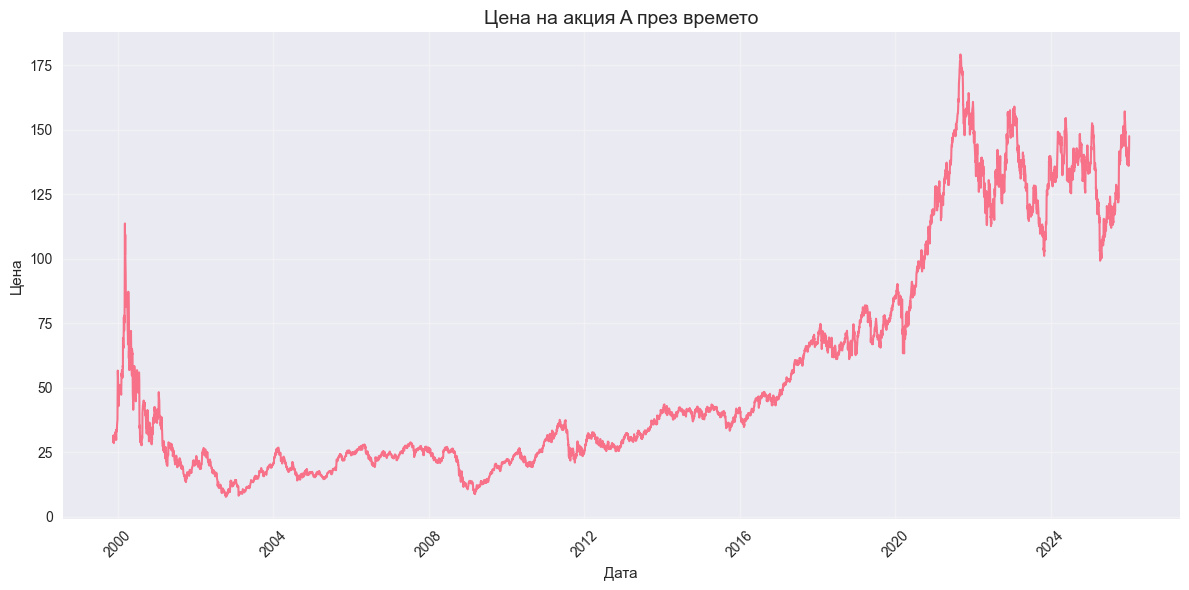

In [11]:
# Визуализация на данни за един тикер (ако има подходящи данни)
# Това ще зависи от структурата на dataset-а

# Опитваме се да намерим close или price колона
price_cols = [col for col in df.columns if 'close' in col.lower() or 'price' in col.lower()]

if price_cols and date_cols and len(unique_tickers) > 0:
    # Избираме първия наличен тикер
    sample_ticker = unique_tickers[0] if len(unique_tickers) > 0 else None
    
    if sample_ticker:
        ticker_col = 'symbol' if 'symbol' in df.columns else ticker_cols[0]
        ticker_data = df[df[ticker_col] == sample_ticker].copy()
        ticker_data = ticker_data.sort_values(date_cols[0])
        
        if len(ticker_data) > 0:
            plt.figure(figsize=(12, 6))
            plt.plot(ticker_data[date_cols[0]], ticker_data[price_cols[0]], linewidth=1.5)
            plt.title(f'Цена на акция {sample_ticker} през времето', fontsize=14)
            plt.xlabel('Дата')
            plt.ylabel('Цена')
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("Няма данни за визуализация")
    else:
        print("Няма наличен тикер за визуализация")
else:
    print("Не можах да намеря подходящи колони за визуализация")
    print(f"Price колони: {price_cols}")
    print(f"Date колони: {date_cols}")


## Заключение

- Размер на dataset: {размери}
- Брой тикери: {брой}
- Период: {период}
- Следващи стъпки: Преглед на структурата и започване на предобработка
